In [2]:
from process import *
from calculate import *
from plots import *
from envelopes import *
from supports import *
from plotsettings import *

import numpy as np
import matplotlib.pyplot as plt
from copy import copy

In [22]:
sim_wd_red = [1.36736, 1.36660, 1.36556, 1.36420, 1.3625, 1.3603, 1.3554]  # drive frequency
sim_devdr_red = 2*np.asarray(sim_wd_red) - 2.735930  # deviation by driving
sim_wsb_red = [0.0001082, 0.0002441, 0.0004334, 0.0006784, 0.0009815, 0.001462, 0.002291]  # transition frequency

sim_wd_blue = [5.4375, 5.4318, 5.4238, 5.4131, 5.4002, 5.3843, 5.3460]  # drive frequency
sim_devdr_blue = 2*np.asarray(sim_wd_blue) - 10.88399  # deviation by driving
sim_wsb_blue = [0.0007594, 0.001719, 0.003103, 0.004899, 0.007200, 0.009999, 0.01812]  # transition frequency

sim_eps = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.9]  # driving strength / 2

polydeg = 2
sim_wd_red_cfit = np.polyfit(sim_eps, sim_wd_red, polydeg)
sim_devdr_red_cfit = np.polyfit(sim_eps, sim_devdr_red, polydeg)
sim_wsb_red_cfit = np.polyfit(sim_eps, sim_wsb_red, polydeg)
sim_wd_blue_cfit = np.polyfit(sim_eps, sim_wd_blue, polydeg)
sim_devdr_blue_cfit = np.polyfit(sim_eps, sim_devdr_blue, polydeg)
sim_wsb_blue_cfit = np.polyfit(sim_eps, sim_wsb_blue, polydeg)

In [24]:
meas_wd_red = [1.3646, 1.3637, 1.3625, 1.3613, 1.3595, 1.3574, 1.3545]
meas_devdr_red = 2*np.asarray(meas_wd_red) - 2.735930
meas_wsb_red = [0.000317678, 0.000430714, 0.000553406, 0.000702018, 0.000876634, 0.001131206, 0.001423324]
meas_eps_red = list()
for i, devdr in enumerate(meas_devdr_red):
    p = copy(sim_devdr_red_cfit)
    p[-1] = p[-1] - devdr
    meas_eps_red.append(max(np.roots(p)))

meas_wd_blue = [5.42121, 5.4198, 5.4192, 5.4186, 5.41795, 5.4173, 5.4166, 5.4158, 5.4149, 5.4130, 5.4130, 5.41185, 5.41065, 5.40785, 5.40440, 5.39170, 5.38407]
meas_devdr_blue = 2*np.asarray(meas_wd_blue) - 10.88399
meas_Pin_blue = np.array([-12, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 3, 5, 10, 12])
meas_eps_blue = list()
for i, devdr in enumerate(meas_devdr_blue):
    p = copy(sim_devdr_blue_cfit)
    p[-1] = p[-1] - devdr
    meas_eps_blue.append(max(np.roots(p)))

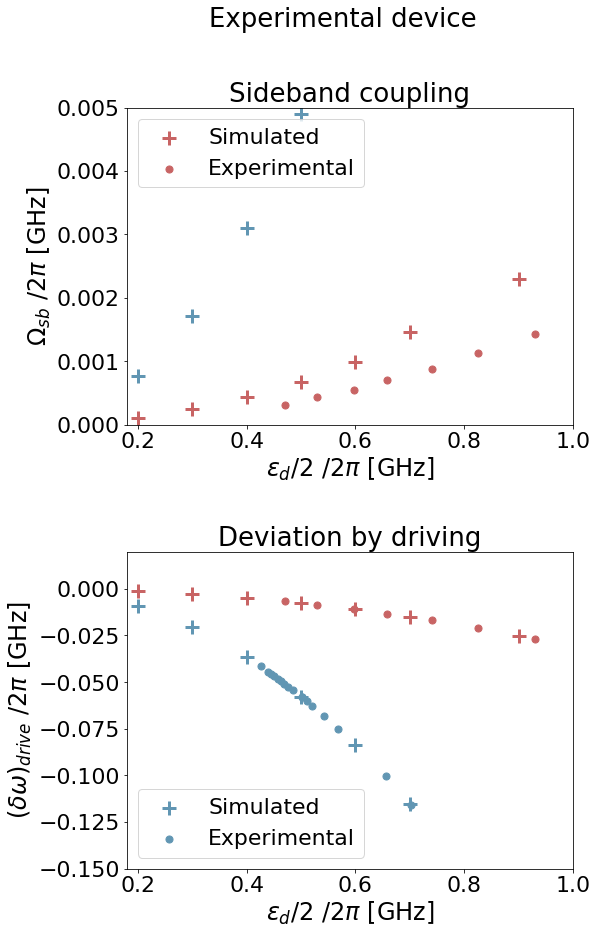

In [29]:
xlim = [0.18, 1.0]

plt.subplots(1, 2, figsize=(8,14))
plt.suptitle("Experimental device")

plt.subplot(2, 1, 1)
plt.scatter(sim_eps, sim_wsb_red, c=plotcolours['sbred'], marker=markerstyles['simulated'], s=200, label='Simulated')
plt.scatter(sim_eps, sim_wsb_blue, c=plotcolours['sbblue'], marker=markerstyles['simulated'], s=200)
plt.scatter(meas_eps_red, meas_wsb_red, c=plotcolours['sbred'], marker=markerstyles['experimental'], s=200, label='Experimental')

plt.xlim(xlim)
plt.ylim([0, 0.005])
plt.xlabel("$\\epsilon_d/2$ $/2\\pi$ [GHz]")
plt.ylabel("$\\Omega_{{sb}}$ $/2\\pi$ [GHz]")
plt.title("Sideband coupling")
plt.legend(loc='upper left')

plt.subplot(2, 1, 2)
plt.scatter(sim_eps, sim_devdr_red, c=plotcolours['sbred'], marker=markerstyles['simulated'], s=200)
plt.scatter(sim_eps, sim_devdr_blue, c=plotcolours['sbblue'], marker=markerstyles['simulated'], s=200, label='Simulated')
plt.scatter(meas_eps_red, meas_devdr_red, c=plotcolours['sbred'], marker=markerstyles['experimental'], s=200)
plt.scatter(meas_eps_blue, meas_devdr_blue, c=plotcolours['sbblue'], marker=markerstyles['experimental'], s=200, label='Experimental')
# plt.plot(np.linspace(0, 1, 50), np.poly1d(sim_devdr_red_cfit)(np.linspace(0, 1, 50)), c=plotcolours['sbred'])
# plt.plot(np.linspace(0, 1, 50), np.poly1d(sim_devdr_blue_cfit)(np.linspace(0, 1, 50)), c=plotcolours['sbblue'])

plt.xlim(xlim)
plt.ylim([-0.15, 0.02])
plt.xlabel("$\\epsilon_d/2$ $/2\\pi$ [GHz]")
plt.ylabel("$(\\delta\omega)_{{drive}}$ $/2\\pi$ [GHz]")
plt.title("Deviation by driving")
plt.legend()

plt.subplots_adjust(wspace=0.6)
plt.subplots_adjust(hspace=0.4)
# plt.subplots_adjust(top=0.83)
plt.show()

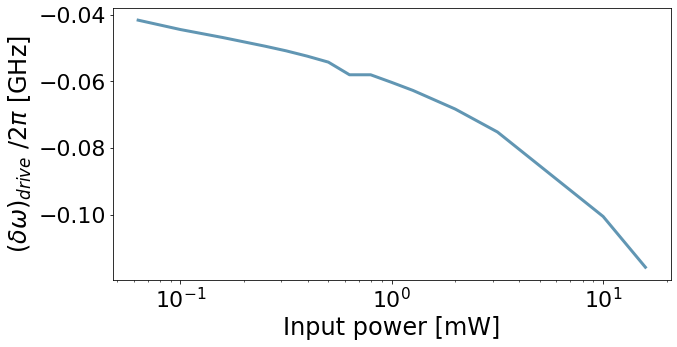

In [10]:
# plt.plot(np.asarray(meas_eps_red)**2, meas_devdr_red, c=plotcolours['sbred'])
plt.semilogx(10**((meas_Pin_blue)/10), meas_devdr_blue, c=plotcolours['sbblue'])
# plt.xscale('log')
plt.xlabel("Input power [mW]")
plt.ylabel("$(\\delta\omega)_{{drive}}$ $/2\\pi$ [GHz]")
plt.show()